In [2]:
import os
import mne
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

parent_dir = 'D:/CHF/polarityReversal/'
base_dir = 'D:/CHF/polarityReversal/eeg/'
os.chdir(base_dir)

## import evoked responses, calculate grand average

In [14]:
def subStr(sub):
    """ function to return the 2-character string of an integer subject number """
    if sub<10:
        subs = '0' + str(sub)
    else:
        subs = str(sub)
    return subs

def cutEvoked(evoked, tmin, tmax):
    """
    function to cut evoked data at specific points and returns the cut evoked data.
    evoked must be a python dictionary of evoked data.
    """
    keys = list(evoked.keys())
    for key in keys:
        evoked[key].crop(tmin=tmin, tmax=tmax, include_tmax=True) # crop it
        evoked[key].shift_time(tshift=0, relative=False) # shift timings
    return evoked

def getIdx(eoi):
    """looks - in a global environment - for some information about the index of a particular electrode"""
    try:
        eoi_idx = raw.ch_names.index(eoi)
    #except NameError:
    #    eoi_idx = epochs.ch_names.index(eoi)
    except NameError:
        print("Getting the channel/electrode indices from a predefined list instead of the data.")
        channel_names = ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5',
                         'FC1', 'FC2', 'FC6', 'T7', 'C3', 'Cz', 'C4', 'T8',
                         'TP9', 'CP5', 'CP1', 'CP2', 'CP6', 'TP10', 'P7', 'P3',
                         'Pz', 'P4', 'P8', 'PO9', 'O1', 'Oz', 'O2', 'PO10']
        eoi_idx = channel_names.index(eoi)
    return eoi_idx

In [26]:
Evoked = {}
for sub in range(7):
    Evoked[sub] = mne.evoked.read_evokeds(base_dir + os.sep + subStr(sub+4) + os.sep + 'data' + os.sep + 'evoked-ave.fif.gz', kind="average", verbose=0)
GrandAvg = {}
for i in range(len(Evoked[0])):
    cond = Evoked[0][i].comment
    GrandAvg[cond] = mne.grand_average([Evoked[k][i] for k in range(7)])   
GrandAvgCut = cutEvoked(GrandAvg, 0.822, 1.322) # was 0.322 as beginning

Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are cor

In [66]:
# get the LVF and UVF data at electrode Oz

lower = GrandAvgCut["13LVF"].data[getIdx("Oz")]
upper = GrandAvgCut["13UVF"].data[getIdx("Oz")]
full  = GrandAvgCut["13FVF"].data[getIdx("Oz")]
summe = GrandAvgCut["13SUM"].data[getIdx("Oz")]

Getting the channel/electrode indices from a predefined list instead of the data.
Getting the channel/electrode indices from a predefined list instead of the data.
Getting the channel/electrode indices from a predefined list instead of the data.
Getting the channel/electrode indices from a predefined list instead of the data.


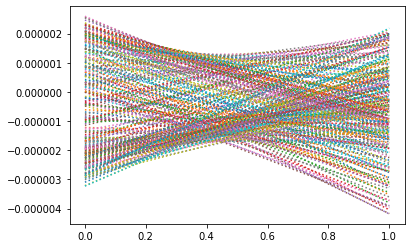

In [42]:
# plot their values

p1 = plt.plot([upper, lower], ":")

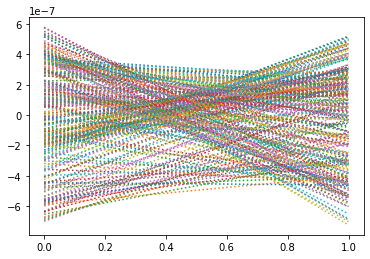

In [67]:
# derivatives

lower2 = np.roll(lower, -1) # shift indices by 1
dlower = lower - lower2

upper2 = np.roll(upper, -1) # shift indices by 1
dupper = upper - upper2

full2 = np.roll(full, -1) # shift indices by 1
dfull = full - full2

summe2 = np.roll(summe, -1) # shift indices by 1
dsumme = summe - summe2

# cut the "cutting" point
dupper = dupper[:-2]
dlower = dlower[:-2]
dfull = dfull[:-2]
dsumme = dsumme[:-2]

p1 = plt.plot([dupper, dlower], ":")

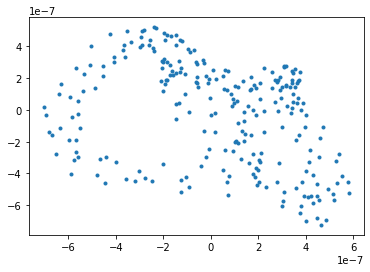

In [65]:
p1 = plt.plot(dupper, dlower, ".")

In [104]:
from scipy.stats import spearmanr, pearsonr

spearmanr(full, summe)

SpearmanrResult(correlation=0.9091838360842344, pvalue=1.0028772480807994e-96)

In [56]:
plt.plot?

In [61]:
dupper[-1]

-4.930164446825943e-06

In [62]:
dlower[-1]

5.25595070131521e-06

## random walk

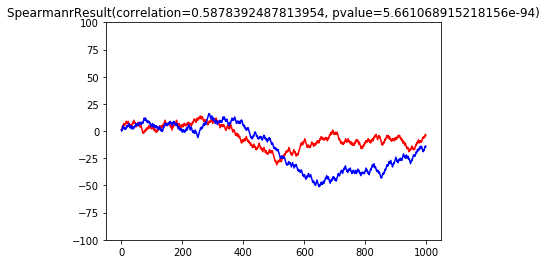

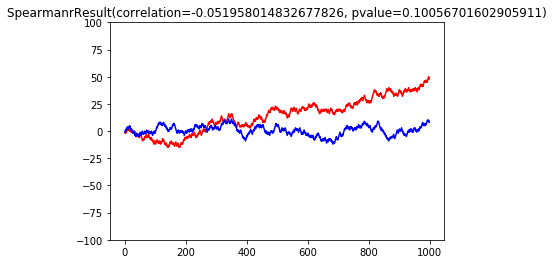

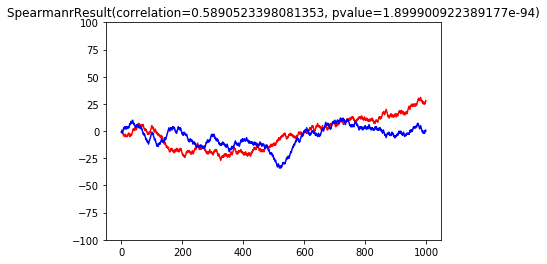

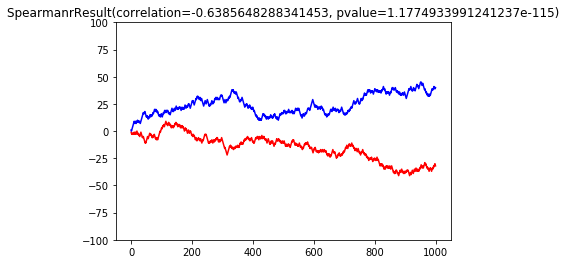

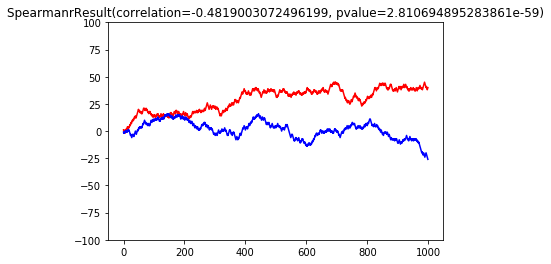

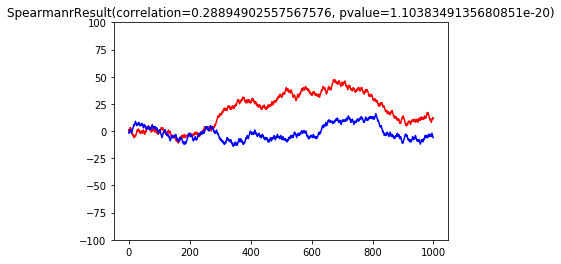

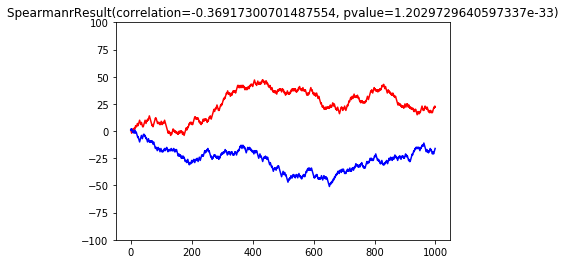

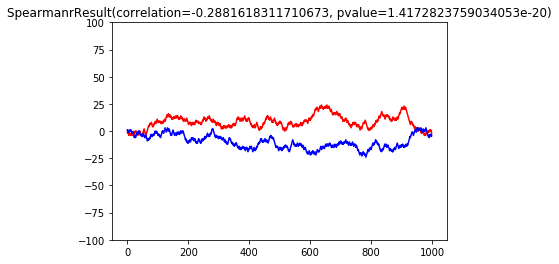

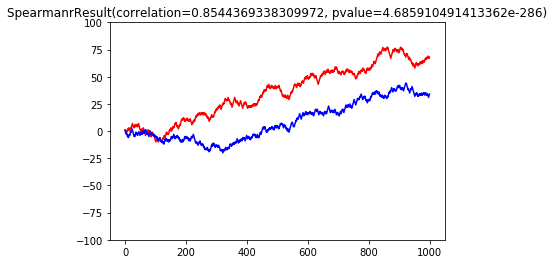

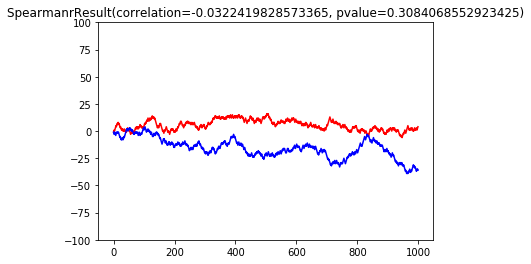

In [134]:
iters = 10
a = list(range(1000))

#fig, axs = plt.subplots(10,1, dpi = 200)

for i in list(range(iters)):
    x = np.random.binomial(n = 1, p = .5, size = 1000)
    x[x==0] = -1
    x = np.cumsum(x)

    y = np.random.binomial(n = 1, p = .5, size = 1000)
    y[y==0] = -1
    y = np.cumsum(y)

    plt.plot(a, x, "r", a, y, "b")
    #plt.title(pearsonr(x,y))
    plt.title(spearmanr(x,y))
    plt.ylim(-100,100)

    plt.show()
